In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
l1 = ['PassengerId', 'Cabin', 'Ticket']
df.drop(l1, inplace= True, axis = 1)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
temp  = df["Name"].unique()

In [8]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [0]:
st = []

for i in temp :
    a = i.split(' ')
    for k in a :
        if '.' in k:
            st.append(k)
            break

In [0]:
st = np.array(st)
df["New_Name"] = st

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [12]:
df["New_Name"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [0]:
l2 = ['Name']
df.drop(l2, axis = 1, inplace = True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_Name      0
dtype: int64

In [0]:
emb = list(df["Embarked"].mode())[0]
df["Age"].fillna(df["Age"].mean(), inplace = True)
df["Embarked"].fillna(emb, inplace = True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_Name    0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_newName = LabelEncoder()

In [0]:
df["Sex"] = le_sex.fit_transform(df["Sex"])
df["Embarked"] = le_embarked.fit_transform(df["Embarked"])
df["New_Name"] = le_newName.fit_transform(df["New_Name"])

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


In [21]:
df.shape

(891, 9)

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
X.shape, y.shape

((891, 8), (891,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((801, 8), (801,), (90, 8), (90,))

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [29]:
X_train.shape, y_train.shape

((801, 8), (801,))

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(units= 32, activation= 'relu', input_shape = (8,)))
classifier.add(Dropout(rate = 0.25))

In [0]:
#hidden layer
classifier.add(Dense(units = 32, activation= 'relu'))
classifier.add(Dropout(rate = 0.25))

In [0]:
classifier.add(Dense(units=1, activation= 'sigmoid'))

In [0]:
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [79]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                288       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [80]:
classifier.fit(X_train, y_train, batch_size= 64, epochs= 100, validation_split= 0.1)

Train on 720 samples, validate on 81 samples
Epoch 1/100
720/720 [==============================] - 0s 323us/step - loss: 0.7383 - accuracy: 0.4139 - val_loss: 0.7399 - val_accuracy: 0.5432
Epoch 2/100
720/720 [==============================] - 0s 73us/step - loss: 0.6799 - accuracy: 0.5806 - val_loss: 0.6872 - val_accuracy: 0.6667
Epoch 3/100
720/720 [==============================] - 0s 75us/step - loss: 0.6251 - accuracy: 0.6847 - val_loss: 0.6481 - val_accuracy: 0.7037
Epoch 4/100
720/720 [==============================] - 0s 101us/step - loss: 0.6000 - accuracy: 0.7292 - val_loss: 0.6189 - val_accuracy: 0.7284
Epoch 5/100
720/720 [==============================] - 0s 78us/step - loss: 0.5645 - accuracy: 0.7500 - val_loss: 0.5936 - val_accuracy: 0.7284
Epoch 6/100
720/720 [==============================] - 0s 77us/step - loss: 0.5292 - accuracy: 0.7653 - val_loss: 0.5760 - val_accuracy: 0.7531
Epoch 7/100
720/720 [==============================] - 0s 74us/step - loss: 0.5203 - accu

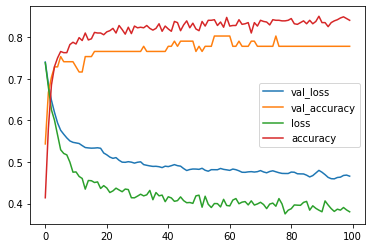

In [81]:
pd.DataFrame(classifier.history.history).plot()
plt.show()

In [82]:
classifier.evaluate(X_test, y_test)

90/90 [==============================] - 0s 119us/step


[0.4715880115826925, 0.8333333134651184]

In [83]:
y_pred = classifier.predict(X_test)
y_pred = y_pred >= 0.5
y_pred[:10]

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False]])

In [0]:
from sklearn.metrics import confusion_matrix

In [85]:
print(confusion_matrix(y_pred, y_test))

[[54 10]
 [ 5 21]]


In [91]:
(54+21)/y_test.shape[0]

0.8333333333333334